In [4]:
# Artificial Neural Network
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read csv to dataframe
df = pd.read_csv('churn_model.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [14]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

''' 
    To Reduce the computation complex and time to sort the high value contains data fields to small range of values
'''

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
#Keras Model

import keras 
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, ReLU, ELU, Dropout

# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the first layer input and hidden neuron layer
classifier.add(Dense(units=7, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [21]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 7, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 4s 786us/step - loss: 0.5635 - accuracy: 0.7225 - val_loss: 0.5006 - val_accuracy: 0.7902
Epoch 2/100
5359/5359 [==============================] - 2s 431us/step - loss: 0.4702 - accuracy: 0.7972 - val_loss: 0.4753 - val_accuracy: 0.7967
Epoch 3/100
5359/5359 [==============================] - 2s 435us/step - loss: 0.4498 - accuracy: 0.8015 - val_loss: 0.4602 - val_accuracy: 0.7986
Epoch 4/100
5359/5359 [==============================] - 2s 442us/step - loss: 0.4371 - accuracy: 0.8044 - val_loss: 0.4495 - val_accuracy: 0.7940
Epoch 5/100
5359/5359 [==============================] - 2s 430us/step - loss: 0.4282 - accuracy: 0.8078 - val_loss: 0.4430 - val_accuracy: 0.7989
Epoch 6/100
5359/5359 [==============================] - 2s 436us/step - loss: 0.4220 - accuracy: 0.8091 - val_loss: 0.4371 - val_accuracy: 0.7967
Epoch 7/100
5359/5359 [==============================] - 2s 417us/step

In [22]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


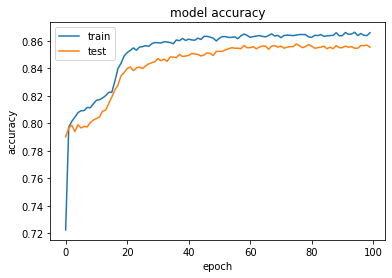

In [25]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

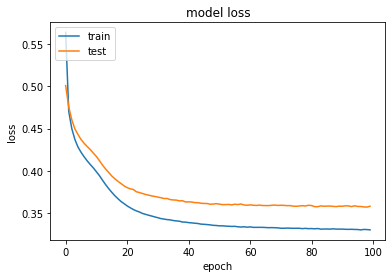

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()